## Notebook to visualize and animate CPP Data

#### First we have a cell to visualize the statespace

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


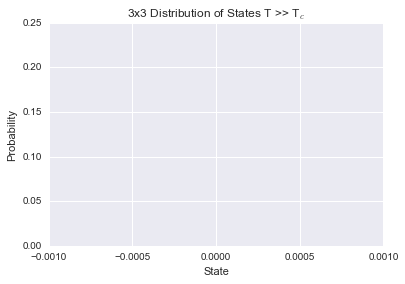

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

states_file = '/Users/jakehanson/Desktop/Causality_Ising/states.txt'
params_file = '/Users/jakehanson/Desktop/Causality_Ising/params.txt'

states = pd.read_table(states_file,header=None)
params = pd.read_table(params_file)

T = params['Temperature'][0]
N = params['Trials'][0]
n_cols = params['n_cols'][0]

hist = dict.fromkeys(np.unique(states),0)
for each in states.values:
    hist[int(each)] = hist[int(each)]+1
for each in hist.keys():
    hist[each] = float(hist[each])/N

plt.bar(hist.keys(),hist.values(),width=1)
plt.title(r'3x3 Distribution of States T >> T$_c$'.format(T))
plt.ylabel('Probability')
plt.xlabel('State')
plt.xlim((0,2**(n_cols*n_cols)))
#plt.savefig('/Users/jakehanson/Desktop/Small_RealHot_Ising_longtrial.pdf')
plt.show()

#### Now lets visualize the spin matrix

In [ ]:
# Define function to output plots
def make_pdf(X,frame_count,T):
    X_image = copy.copy(X)  # Immutable copy of X
    fname = ('_%06d.pdf' % (frame_count))  # assign filename
    plt.imshow(X, cmap='Greys',  interpolation='nearest',vmin=-1,vmax=1)
    plt.xticks([]); plt.yticks([]);
    plt.title(r'T [k$_b$] = ' + str(T))
    plt.savefig('/Users/jakehanson/Desktop/Ising_plots/plot' + fname)
    plt.cla()
    
spin_file = '/Users/jakehanson/Desktop/Causality_Ising/time_series.txt'
spins = pd.read_table(spin_file,header=None)
spins

frame_count = 0
for trial in spins.index:
    matrix = np.zeros((3,3))
    value = 0
    for i in range(3):
        for j in range(3):
            matrix[i][j] = spins.iloc[trial][value]
            value = value+1
    make_pdf(matrix,frame_count,T)
    frame_count = frame_count+1
    
print 'Done'

In [10]:
from ipywidgets import Image
from IPython import display
animatedGif = '/Users/jakehanson/Desktop/Ising_Plots/sim.gif' #path relative to your notebook
file = open(animatedGif , "rb")
image = file.read()
progress= Image(value=image,format='gif',width=350,height=250)
display.display(progress)